In [1]:
"""
Newtons Body of minimal resistence for square domains.
@author: Luis Duque
See Readme File for a very brief introduction and bibliographic references to this problem.
"""

import numpy as np
import random
import matplotlib.pyplot as plt
import copy
import time
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 40; ## Creates a NxN grid in our domain (the square [0,1]x[0,1]) 

class Profile:
    def __init__(self, num_mutations):
        self.Pr= np.random.rand(N,N)
        self.Pr= np.ones((N, N), dtype=float)       
        self.mutate(num_mutations)
                
    def multiply(self):
        print self.i
        return 0
    
    def convexity(self):    # Measures how convex is a given surface by computing averages around each point
        numrows = self.Pr.shape[0]
        deltaL = float(1)/N
        Id = np.ones((numrows-2, numrows-2), dtype=float)
        Z =  np.zeros((numrows-2, numrows-2), dtype=float)
        
        M = self.Pr
        B =  M[1:-1,1:-1]
        B1 = M[ :-2, :-2]
        B2 = M[ :-2,1:-1]
        B3 = M[ :-2,2:  ]
        B4 = M[1:-1, :-2]
        B5 = M[1:-1,2:]
        B6 = M[2:  , :-2]
        B7 = M[2:  ,1:-1]
        B8 = M[2:  ,2:  ]       
        
        # Estimation of the Laplacian
        Laplacian = (B1 + B2 + B3+ B4 + B5 + B6 + B7 + B8)/8 - B
        betaLaplacian = np.maximum(Laplacian, Z) ## penalization function applied to the laplacian
        
        return betaLaplacian.sum()/betaLaplacian.size
    
    def resistence(self):    # Computes Newtons functional for the current profile
        numrows = self.Pr.shape[0]
        deltaL = float(1)/numrows
        M = self.Pr
        Id = np.ones((numrows-2, numrows-2), dtype=float)
        B =  M[1:-1,1:-1]
        B1 = M[ :-2, :-2]
        B2 = M[ :-2,1:-1]
        B3 = M[ :-2,2:  ]
        B4 = M[1:-1, :-2]
        B5 = M[1:-1,2:]
        B6 = M[2:  , :-2]
        B7 = M[2:  ,1:-1]
        B8 = M[2:  ,2:  ]
        
        ## Estimation of the gradient
        absgrad = ( abs(B1-B)+abs(B2-B)+abs(B3-B)+abs(B4-B)+abs(B5-B)+abs(B6-B)+abs(B7-B)+abs(B8-B) )/(deltaL*8)
        sqrgrad = absgrad**2
        
        ## Computation of the functional
        F= Id/(Id+sqrgrad)
        
        return F.sum()/F.size
    
    def mutate(self, num_mutations):  
        for i in range(0,num_mutations):
            Pl = Plane()
            self.Pr = np.minimum(self.Pr, Pl.P)
            M = np.max(self.Pr)
            if M>0:       ##normalize
                self.Pr = self.Pr/M
        
            
    def plot(self):
        fig = plt.figure(figsize=(14,12))
        ax = fig.gca(projection='3d')
        
        deltaL = float(1)/N
        x = np.arange(N)
        y = np.arange(N)
        X, Y = np.meshgrid(x, y)
        Z = self.Pr[X,Y]
               
        surf = ax.plot_surface(X*deltaL, Y*deltaL, Z)
        #ax.contour3D(X*deltaL, Y*deltaL, Z, 50, cmap='binary')
        plt.show()
    
    def printP(self):
        print np.around(self.Pr, decimals=2)
       
    
class Plane:
    def __init__(self):
        self.P = np.zeros((N, N), dtype=float)
        self.A = (np.random.rand(3)-0.5)*2   ## it would be wise to generate this in a different way.        
        deltaL = float(1)/N 
    
        for i in range(0, N):
            for j in range(0,N):
                x = deltaL*i
                y = deltaL*j
                self.P[i,j]=self.A[0]*x + self.A[1]*y + self.A[2]
        m = np.min([ self.P[0,0], self.P[0,-1], self.P[-1,0], self.P[-1,-1] ] )
        
        
        if m < 0:
            self.P = self.P - m
            
    def plot(self):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        x = np.arange(N)
        y = np.arange(N)
        X, Y = np.meshgrid(x, y)
        Z = self.P[X,Y]
        
        ax.contour3D(X, Y, Z, 50, cmap='binary')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z');  
            

In [3]:
def ImproveProfile(cProfile, num_mutations = 5, num_mins = 1):
    start_time = time.time()
    Best = copy.deepcopy(cProfile)
    Bresistence = Best.resistence()
    
    while( (time.time()-start_time)/60 < num_mins):
        A = copy.deepcopy(cProfile)
        A.mutate(num_mutations)

        if A.resistence() < Bresistence:
            Best = copy.deepcopy(A)
            Bresistence = Best.resistence()

    print "The best resistence so far is ", Best.resistence()
    return Best



## The following is very similar alternative to the previous function. It is also greedy.
def ImproveProfileAlt(cProfile, num_mins = 1):
    start_time = time.time()
    Best = copy.deepcopy(cProfile)
    Bresistence = Best.resistence()
    
    while( (time.time()-start_time)/60 < num_mins):
        num_mutations = random.randint(1, 40)
        A = copy.deepcopy(cProfile)
        A.mutate(num_mutations)

        if A.resistence() < Bresistence:
            Best = copy.deepcopy(A)
            Bresistence = Best.resistence()

    print "The best resistence so far is ", Best.resistence()
    return Best



The best resistence so far is  0.29402731008531374
The best resistence so far is  0.28846856753321726
The best resistence so far is  0.28846856753321726
The best resistence so far is  0.2884313805813721
The best resistence so far is  0.28753512402833203
The best resistence so far is  0.2875123791377535
The best resistence so far is  0.2875123791377535
The best resistence so far is  0.2704353954650782
The best resistence so far is  0.2682370563535243
The best resistence so far is  0.26626542985056934
The best resistence so far is  0.26626542985056934
The best resistence so far is  0.26626542985056934
The best resistence so far is  0.26626542985056934
The best resistence so far is  0.26626542985056934
The best resistence so far is  0.26626542985056934
The best resistence so far is  0.26626542985056934


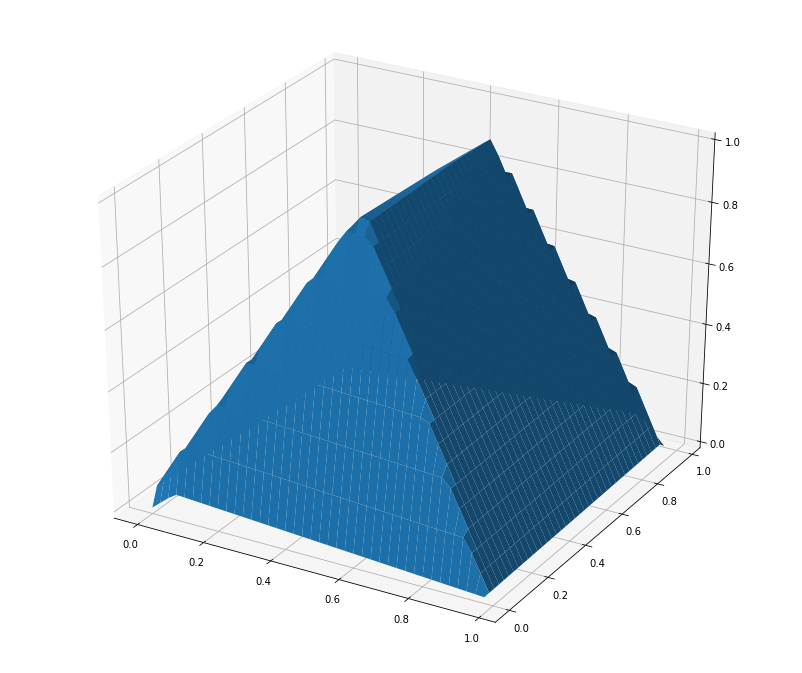

The best profile found has resistence =  0.26626542985056934


In [4]:
## Second experiment (takes 6 hours running)
Best2 = Profile(0)
Best2 = ImproveProfileAlt(Best2,  num_mins = 120)
Best2 = ImproveProfileAlt(Best2,  num_mins = 20)
Best2 = ImproveProfileAlt(Best2,  num_mins = 20)
Best2 = ImproveProfileAlt(Best2,  num_mins = 20)
Best2 = ImproveProfileAlt(Best2,  num_mins = 20)
Best2 = ImproveProfileAlt(Best2,  num_mins = 20)
Best2 = ImproveProfileAlt(Best2,  num_mins = 20)
Best2 = ImproveProfile(Best2,  num_mutations = 2, num_mins  = 10)
Best2 = ImproveProfile(Best2,  num_mutations = 2, num_mins  = 10)
Best2 = ImproveProfile(Best2,  num_mutations = 2, num_mins  = 10)
Best2 = ImproveProfile(Best2,  num_mutations = 10, num_mins = 20)
Best2 = ImproveProfile(Best2,  num_mutations = 10, num_mins = 20)
Best2 = ImproveProfile(Best2,  num_mutations = 10, num_mins = 20)
Best2 = ImproveProfile(Best2,  num_mutations = 4 , num_mins = 10)
Best2 = ImproveProfile(Best2,  num_mutations = 4 , num_mins = 10)
Best2 = ImproveProfile(Best2,  num_mutations = 4 , num_mins = 10)


Best2.plot()
print "The best profile found has resistence = ", Best2.resistence()

The best resistence so far is  0.26626542985056934
The best resistence so far is  0.26626542985056934
The best resistence so far is  0.26626542985056934
The best resistence so far is  0.26626542985056934
The best resistence so far is  0.26617109981126214
The best resistence so far is  0.26615797929522744
The best resistence so far is  0.26553870309575506
The best resistence so far is  0.26553870309575506
The best resistence so far is  0.26553870309575506
The best resistence so far is  0.26553870309575506
The best resistence so far is  0.26553870309575506
The best resistence so far is  0.26553870309575506
The best resistence so far is  0.26553870309575506
The best resistence so far is  0.2592748502519047
The best resistence so far is  0.25838826209463484
The best resistence so far is  0.25838826209463484


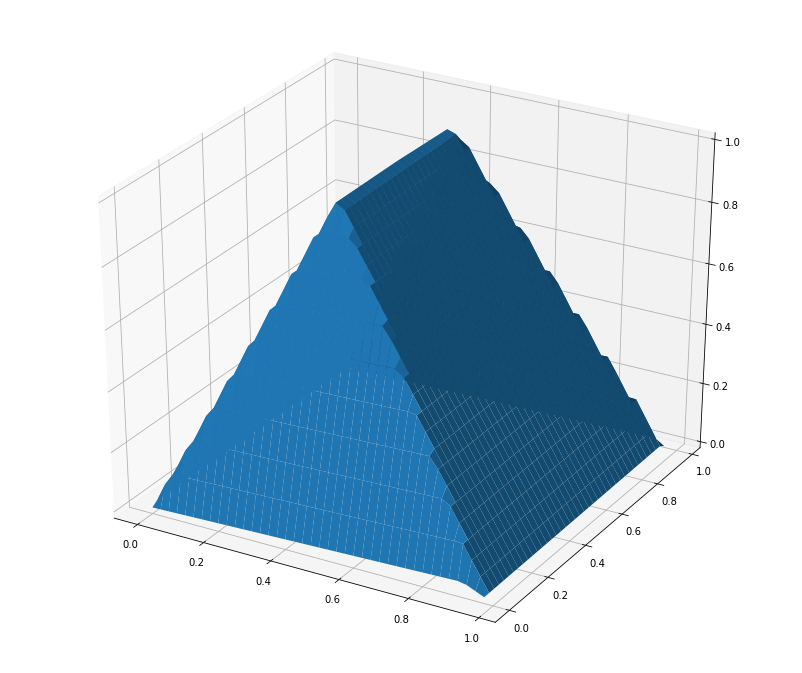

The best profile found has resistence =  0.25838826209463484


In [5]:
## First experiment (5 hours running)
Best = Best2
Best = ImproveProfile(Best,  num_mutations = 20, num_mins = 60)
Best = ImproveProfile(Best,  num_mutations = 10, num_mins = 20)
Best = ImproveProfile(Best,  num_mutations = 10, num_mins = 20)
Best = ImproveProfile(Best,  num_mutations = 10, num_mins = 20)
Best = ImproveProfile(Best,  num_mutations = 2, num_mins  = 10)
Best = ImproveProfile(Best,  num_mutations = 2, num_mins  = 10)
Best = ImproveProfile(Best,  num_mutations = 2, num_mins  = 10)
Best = ImproveProfile(Best,  num_mutations = 10, num_mins = 20)
Best = ImproveProfile(Best,  num_mutations = 10, num_mins = 20)
Best = ImproveProfile(Best,  num_mutations = 10, num_mins = 20)
Best = ImproveProfile(Best,  num_mutations = 4 , num_mins = 10)
Best = ImproveProfile(Best,  num_mutations = 4 , num_mins = 10)
Best = ImproveProfile(Best,  num_mutations = 4 , num_mins = 10)
Best = ImproveProfile(Best,  num_mutations = 2, num_mins  = 10)
Best = ImproveProfile(Best,  num_mutations = 2, num_mins  = 10)
Best = ImproveProfile(Best,  num_mutations = 2, num_mins  = 10)

Best.plot()
print "The best profile found has resistence = ", Best.resistence()